In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

In [2]:
theta=np.array([-10, 1.0, 1.0, 1.0, 1.0]).T

In [3]:
iris = load_iris()
x = iris.data 
y = iris.target
N,D = x.shape#150,4
x = np.hstack([np.ones((N,1)), x[:,0:4]])

In [4]:
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = -1
iris_L=len(x)

In [5]:

eta = 1e-3 # learning rate
maxEpoch = 100
iris_L=len(x)

cost = []
L=[]
for epoch in range(maxEpoch):
    # w, x -> prediction
    y_pred = x.dot(theta)
    t_pred = np.sign( y_pred)
    # misclassified pattern
    id_misclass = np.where( y_pred * t < 0 )[0]
#     id_misclass = np.random.permutation(id_misclass)

    # cost
    cost.append(-np.sum( y_pred[id_misclass]*t[id_misclass] ))
    #ACCURACY
    L.append((np.sum(t_pred==t)/iris_L)*100)
    for n in id_misclass:
        grad = t[n] * x[n,:]
        theta =theta + eta * grad    

In [6]:
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = 0

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

eta = 1e-3
maxEpoch = 100
cost2 = []
L2=[]

theta2=np.array([-10, 1.0, 1.0, 1.0, 1.0]).T

for epoch in range(maxEpoch):
    # prediction
    a_pred = x.dot(theta2)
    y_pred2 = sigmoid(a_pred)
    
    grad2 = (y_pred2 - t).reshape(1,-1).dot(x).reshape(-1)
    theta2 = theta2 - eta*grad2

    # cost = cross-entropy
    # t_n log y_n + (1 - t_n) log (1 - y_n)
    cost2.append( - np.sum( t*np.log(y_pred2) + (1 - t)*np.log(1 - y_pred2) ) )
    L2.append((np.sum((y_pred2>0.5)==t)/iris_L)*100)

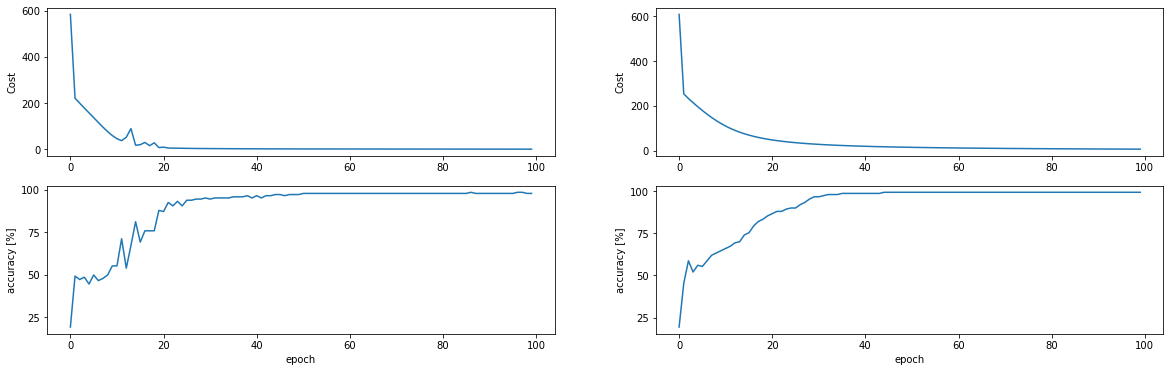

In [7]:
fig ,axs=plt.subplots(2,2,figsize=(20,6))
axs[0][0].plot(cost)
axs[0][0].set_yticks([0,200,400,600])
axs[0][0].set_ylabel('Cost')

axs[0][1].plot(cost2)
axs[0][1].set_yticks([0,200,400,600])
axs[0][1].set_ylabel('Cost')

axs[1][0].plot(L)
axs[1][0].set_yticks([25,50,75,100])
axs[1][0].set_xlabel('epoch')
axs[1][0].set_ylabel('accuracy [%]')

axs[1][1].plot(L2)
axs[1][1].set_yticks([25,50,75,100])
axs[1][1].set_xlabel('epoch')
axs[1][1].set_ylabel('accuracy [%]')
plt.show()